### Xavier による重みの初期化

活性化関数にシグモイド関数を用いる場合に利用される。

全層のノードの個数をnとした場合、1/sqrt(n) の標準偏差を持つ分布を使う。

分布は、一様分布、ガウス分布など様々な方法があるみたい。


In [6]:
import tensorflow as tf
import numpy as np

In [2]:
W_ = tf.get_variable("W", shape=[784, 256],
           initializer=tf.contrib.layers.xavier_initializer())

In [16]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    W = np.array(sess.run([W_][0]))

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
W = W.reshape(1,-1)[0]

(array([ 19904.,  20043.,  20275.,  20072.,  20091.,  20201.,  20298.,
         19831.,  19964.,  20025.]),
 array([ -7.59545118e-02,  -6.07635856e-02,  -4.55726594e-02,
         -3.03817332e-02,  -1.51908070e-02,   1.19209290e-07,
          1.51910454e-02,   3.03819716e-02,   4.55728978e-02,
          6.07638240e-02,   7.59547502e-02]),
 <a list of 10 Patch objects>)

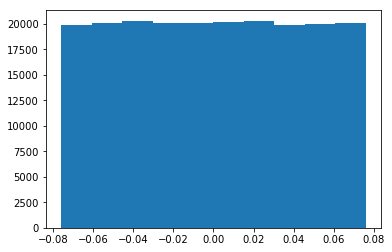

In [28]:
plt.hist(W)

### He による重みの初期化

活性化関数にReLUを用いる場合に利用される。

全層のノードの数がn個の場合、sart(2/n)を標準偏差とするガウス分布を用いる。

「Xavierの初期値」がsqrt(1/n)であったことを考えると、ReLUの場合は負の領域が0になるため、より広がりを持たせるために倍の係数が必要になると（直感的には）解釈できる。

In [31]:
#n_inputs = int(X.get_shape()[1])
n_inputs = 784
n_neurons = 256
stddev = 2 / np.sqrt(n_inputs)
init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
W_ = tf.Variable(init)

In [32]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    W = np.array(sess.run([W_][0]))

In [33]:
W = W.reshape(1,-1)[0]

(array([  6646.,  12741.,  20248.,  27908.,  32549.,  32644.,  28173.,
         20296.,  12657.,   6842.]),
 array([ -1.42854244e-01,  -1.14283115e-01,  -8.57119858e-02,
         -5.71408570e-02,  -2.85697281e-02,   1.40070915e-06,
          2.85725296e-02,   5.71436584e-02,   8.57147872e-02,
          1.14285916e-01,   1.42857045e-01]),
 <a list of 10 Patch objects>)

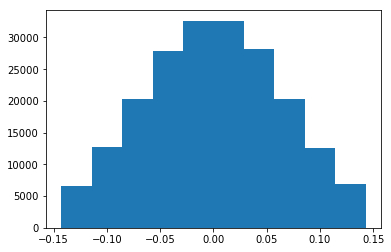

In [34]:
plt.hist(W)